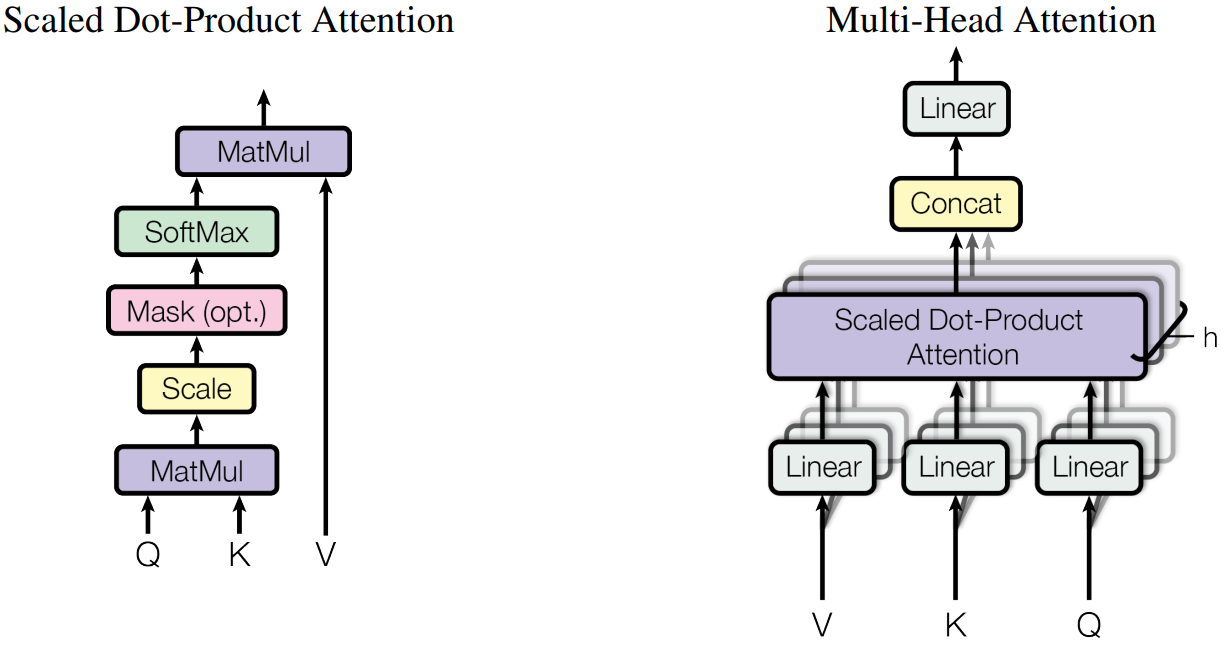

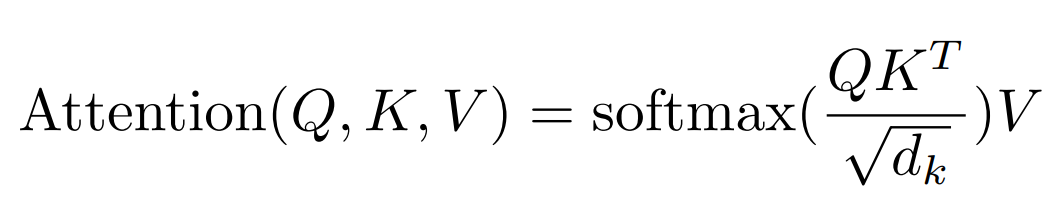

In [1]:
import torch
from torch import nn

In [2]:
class SelfAttention(nn.Module):
    # `embed_dim` is Size of a single patch
    # `heads` is number of head
    def __init(self, embed_dim, heads):
        self.embed_dim = embed_dim
        self.heads = heads
        self.head_dim = embed_dim // heads

        self.values = nn.Linear(self.embed_dim, self.head_dim, bias=False)
        self.keys = nn.Linear(self.embed_dim, self.head_dim, bias=False)
        self.queries = nn.Linear(self.embed_dim, self.head_dim, bias=False)

        self.fc_out = nn.Linear(self.head_dim * self.heads, self.embed_dim)

    # values/keys/queries shape: (batch_size, seq_len, embed_dim)

    def forward(self, values, keys, queries, mask):
        N = queries.shape[0]
        value_len, key_len, query_len = values.shape[1], keys.shape[1], queries.shape[1]

        # Reshape (batch_size, seq_len, embed_dim) to (batch_size, seq_len, heads, head_dim)
        values = values.reshape(N, value_len, self.heads, self.head_dim)
        keys = keys.reshape(N, key_len, self.heads, self.head_dim)
        queries = queries.reshape(N, query_len, self.heads, self.head_dim)

        qxkt = torch.einsum('nqhd,nkhd -> nhqk', queries, keys)

        attention_score = nn.Softmax(dim=3)(qxkt / (self.head_dim ** (1 / 2)))

        # Reshape (batch_size, seq_len, heads, head_dim) to (batch_size, seq_len, embed_dim)
        out = (torch.einsum('nhqv,nvhd -> nqhd', attention_score, values)
               .reshape(N, query_len, self.heads * self.head_dim))
        
        return self.fc_out(out)